In [34]:
import data_preprocessing as dpp 
import visualization_and_algorithm as vaa

from importlib import reload

reload(dpp)
reload(vaa)

<module 'visualization_and_algorithm' from '/Users/mikomiwa/Downloads/COLLEGE/Github_folder/DATA440/visualization_and_algorithm.py'>

In [35]:
import pandas as pd

In [36]:
conn, c = dpp.Connect()

## Example with ProAla

In [37]:
dipep = 'ProAla'

#makes a table named 't{dipep}'
vaa.make_dipep_tables(dipep)

True

In [38]:
pd.read_sql(f'SELECT * FROM t{dipep}', conn).head(3)

,conformer_id,conformer_file,isomer,ring
0,proala0054,proala0054a.log:,t,4i
1,proala0005,proala0005a.log:,t,4o
2,proala0043,proala0043a.log:,t,4o


In [39]:
#####
# trans isomers
#####

sql = f'''
SELECT conformer_id, isomer, ring
FROM t{dipep}
WHERE isomer='t'
'''

globals()[f'{dipep}_t_df'] = pd.read_sql(sql, conn)

dipep_conformer = globals()[f'{dipep}_t_df'].iloc[0]['conformer_id']

In [40]:
dipep_conformer

'proala0054'

In [41]:
#makes a table names 't{dipep_conformer}'
vaa.make_conf_tables(dipep, dipep_conformer)

########## read_coords() Done ##########


True

In [42]:
pd.read_sql(f'SELECT * FROM t{dipep_conformer}', conn).head(3)

,atom_idx,element,x_coord,y_coord,z_coord
0,1,C,-2.954504,-1.542673,0.326014
1,2,N,-1.877768,-1.178467,-0.616389
2,3,C,-1.882640,0.283659,-0.840691


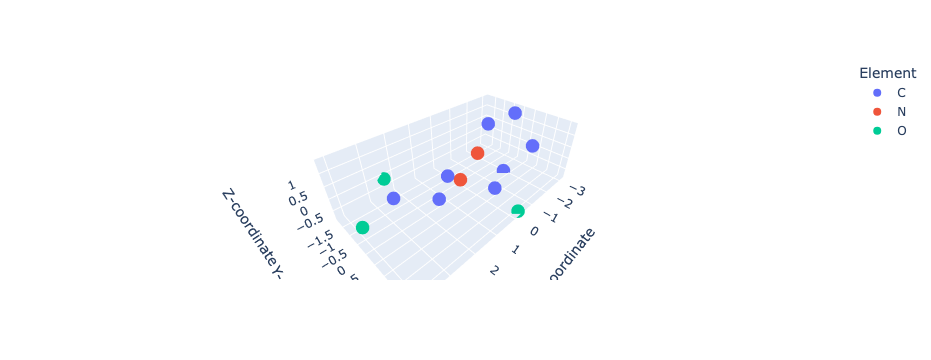

In [43]:
#visualize the conformer
globals()[f'{dipep_conformer}_df'], globals()[f'{dipep_conformer}_fig']= vaa.conf_visualization(dipep_conformer)
globals()[f'{dipep_conformer}_fig'].show()

In [44]:
#now let's see if based on the coordinates we can identify the molecule as cis or trans
vaa.c_t_isomer(dipep_conformer)

(177.07625164853283, 't')

In [ ]:
#let's validate this classification 